<a href="https://colab.research.google.com/github/Sarinda251/CAP_5610/blob/master/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task1

imports

In [158]:
import math
import random
import time
from tkinter import *
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import pairwise_distances_argmin
from scipy.spatial.distance import jaccard

In [159]:
######################################################################
# This section contains functions for loading CSV (comma separated values)
# files and convert them to a dataset of instances.
# Each instance is a tuple of attributes. The entire dataset is a list
# of tuples.
######################################################################

# Loads a CSV files into a list of tuples.
# Ignores the first row of the file (header).
# Numeric attributes are converted to floats, nominal attributes
# are represented with strings.
# Parameters:
#   fileName: name of the CSV file to be read
# Returns: a list of tuples
def loadCSV(fileName):
    fileHandler = open(fileName, "rt")
    lines = fileHandler.readlines()
    fileHandler.close()
    del lines[0] # remove the header
    dataset = []
    for line in lines:
        instance = lineToTuple(line)
        dataset.append(instance)
    return dataset

# Converts a comma separated string into a tuple
# Parameters
#   line: a string
# Returns: a tuple
def lineToTuple(line):
    # remove leading/trailing witespace and newlines
    cleanLine = line.strip()
    # get rid of quotes
    cleanLine = cleanLine.replace('"', '')
    # separate the fields
    lineList = cleanLine.split(",")
    # convert strings into numbers
    stringsToNumbers(lineList)
    lineTuple = tuple(lineList)
    return lineTuple

# Destructively converts all the string elements representing numbers
# to floating point numbers.
# Parameters:
#   myList: a list of strings
# Returns None
def stringsToNumbers(myList):
    for i in range(len(myList)):
        if (isValidNumberString(myList[i])):
            myList[i] = float(myList[i])

# Checks if a given string can be safely converted into a positive float.
# Parameters:
#   s: the string to be checked
# Returns: True if the string represents a positive float, False otherwise
def isValidNumberString(s):
  if len(s) == 0:
    return False
  if  len(s) > 1 and s[0] == "-":
      s = s[1:]
  for c in s:
    if c not in "0123456789.":
      return False
  return True


##Part 1

In [160]:
def find_clusters(X, n_clusters, centers):
 
    first = True    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers, metric='manhattan')
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        if(first):
          print("First iteration centers:")
          print("(" + str(new_centers[0][0]) + "," + str(new_centers[0][1]) + ")")
          print("(" + str(new_centers[1][0]) + "," + str(new_centers[1][1]) + ")")
          first = False
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels


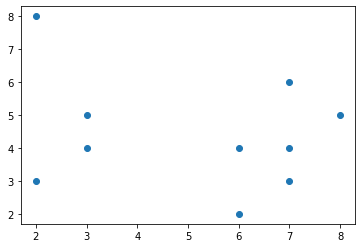

Initial centers:
(4,6)
(5,4)
First iteration centers:
(4.0,6.333333333333333)
(5.571428571428571,3.5714285714285716)


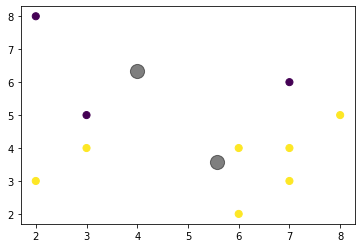

In [161]:
######################################################################
# Test code
######################################################################

dataset = loadCSV("teams.csv")
#print(dataset)
#print([x[1:] for x in dataset])
plt.scatter([x[1] for x in dataset], [x[2] for x in dataset])
plt.show()

init_center = [(4,6),(5,4)]
print("Initial centers:")
print("(" + str(init_center[0][0]) + "," + str(init_center[0][1]) + ")")
print("(" + str(init_center[1][0]) + "," + str(init_center[1][1]) + ")")

centers, labels = find_clusters(np.array([x[1:] for x in dataset]), 2, init_center)
plt.scatter([x[1] for x in dataset], [x[2] for x in dataset], c=labels, s=50, cmap='viridis');
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

##Part 2

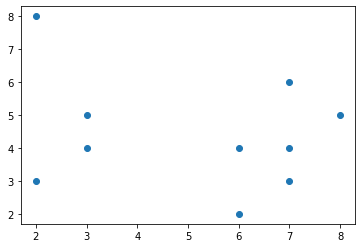

Initial centers:
(4,6)
(5,4)
First iteration centers:
(2.5,6.5)
(5.75,3.875)


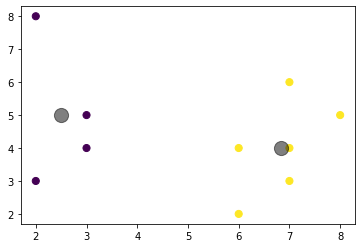

In [162]:
def find_clusters2(X, n_clusters, centers):
 
    first = True    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers, metric='euclidean')
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        if(first):
          print("First iteration centers:")
          print("(" + str(new_centers[0][0]) + "," + str(new_centers[0][1]) + ")")
          print("(" + str(new_centers[1][0]) + "," + str(new_centers[1][1]) + ")")
          first = False
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

######################################################################
# Test code
######################################################################

plt.scatter([x[1] for x in dataset], [x[2] for x in dataset])
plt.show()

init_center = [(4,6),(5,4)]
print("Initial centers:")
print("(" + str(init_center[0][0]) + "," + str(init_center[0][1]) + ")")
print("(" + str(init_center[1][0]) + "," + str(init_center[1][1]) + ")")

centers, labels = find_clusters2(np.array([x[1:] for x in dataset]), 2, init_center)

plt.scatter([x[1] for x in dataset], [x[2] for x in dataset], c=labels,s=50, cmap='viridis');
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

##Part 3

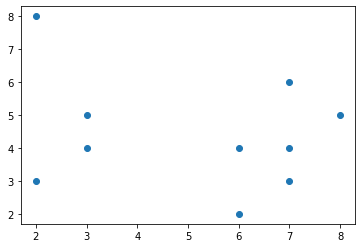

Initial centers:
(3,3)
(8,3)
First iteration centers:
(2.5,5.0)
(6.833333333333333,4.0)


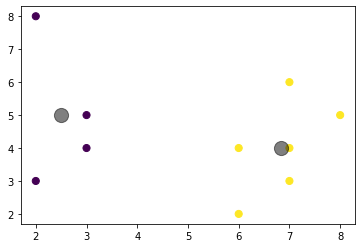

In [163]:
def find_clusters3(X, n_clusters, centers):
 
    first = True    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers, metric='manhattan')
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        if(first):
          print("First iteration centers:")
          print("(" + str(new_centers[0][0]) + "," + str(new_centers[0][1]) + ")")
          print("(" + str(new_centers[1][0]) + "," + str(new_centers[1][1]) + ")")
          first = False
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

######################################################################
# Test code
######################################################################

plt.scatter([x[1] for x in dataset], [x[2] for x in dataset])
plt.show()

init_center = [(3,3),(8,3)]
print("Initial centers:")
print("(" + str(init_center[0][0]) + "," + str(init_center[0][1]) + ")")
print("(" + str(init_center[1][0]) + "," + str(init_center[1][1]) + ")")

centers, labels = find_clusters3(np.array([x[1:] for x in dataset]), 2, init_center)

plt.scatter([x[1] for x in dataset], [x[2] for x in dataset], c=labels,s=50, cmap='viridis');
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

##Part 4

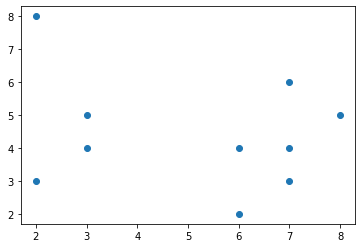

Initial centers:
(3,2)
(4,8)
First iteration centers:
(4.857142857142857,3.5714285714285716)
(5.666666666666667,6.333333333333333)


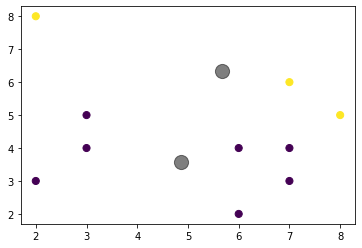

In [164]:
def find_clusters3(X, n_clusters, centers):
 
    first = True    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers, metric='manhattan')
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        if(first):
          print("First iteration centers:")
          print("(" + str(new_centers[0][0]) + "," + str(new_centers[0][1]) + ")")
          print("(" + str(new_centers[1][0]) + "," + str(new_centers[1][1]) + ")")
          first = False
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

######################################################################
# Test code
######################################################################

plt.scatter([x[1] for x in dataset], [x[2] for x in dataset])
plt.show()

init_center = [(3,2),(4,8)]
print("Initial centers:")
print("(" + str(init_center[0][0]) + "," + str(init_center[0][1]) + ")")
print("(" + str(init_center[1][0]) + "," + str(init_center[1][1]) + ")")

centers, labels = find_clusters3(np.array([x[1:] for x in dataset]), 2, init_center)

plt.scatter([x[1] for x in dataset], [x[2] for x in dataset], c=labels,s=50, cmap='viridis');
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

#Task 2

imports

In [165]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import time


###Q1

In [166]:
def kMeans(X, n_clusters, dist):
    start = time.time()
    # 1. Randomly choose clusters
    rseed=2
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    iters = 0

    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers, metric=dist)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
        iters += 1
    return centers, labels, iters, start - time.time()

def SSE(X, labels, centers, length):
  result = 0
  for i in range(len(X)):
    for j in range(length):
      result += (X[i][j] - centers[labels[i]][j]) ** 2
      #print(result)
  return result

In [167]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
cent_e, label_e, iters_e, time_e = kMeans(X, 3, 'euclidean')
#print(cent_e)
#print(X)
sse_e = SSE(X, label_e, cent_e, 4)
print("Euclidian SSE")
print(sse_e)

Euclidian SSE
142.75406250000012


In [168]:
X = iris.data
y = iris.target
cent_c, label_c, iters_c, time_c = kMeans(X, 3, 'cosine')
#print(cent_c)
#print(X)
sse_c = SSE(X, label_c, cent_e, 4)
print("Cosine SSE")
print(sse_c)

Cosine SSE
159.46835700757592


In [169]:
def jaccard2(arr1, arr2):
  num = 0
  den = 0
  for i in range(len(arr1)):
    num += min(arr1[i], arr2[i])
    den += max(arr1[i], arr2[i])
  
  return 1 - (num/den)

def kMeans2(X, n_clusters):
    start = time.time()
    # 1. Randomly choose clusters
    rseed=2
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    iters = 0

    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers, metric = lambda a,b: jaccard2(a,b))
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
        iters += 1
    return centers, labels, iters, start - time.time()

X = iris.data
y = iris.target
cent_j, label_j, iters_j, time_j = kMeans2(X, 3)
#print(cent_e)
#print(X)
sse_j = SSE(X, label_j, cent_j, 4)
print("Jaccard SSE")
print(sse_j)

Jaccard SSE
147.54080519480527


###Q2

In [170]:
def ACC(labels, targets):
  correct = 0
  for i in range(len(labels)):
    if labels[i] == targets[i]:
      correct += 1
  return correct / len(labels)

In [171]:
print("Euclidean Accuracy")
print(ACC(label_e, y))
print("Cosine Accuracy")
print(ACC(label_c, y))
print("Jaccard Accuracy")
print(ACC(label_j, y))

Euclidean Accuracy
0.5733333333333334
Cosine Accuracy
0.49333333333333335
Jaccard Accuracy
0.52


###Q3

In [172]:
print("Euclidean Iterations")
print(iters_e)
print("Cosine Iterations")
print(iters_c)
print("Jaccard Iterations")
print(iters_j)
print("Euclidean Time")
print(-1 * time_e)
print("Cosine Time")
print(-1 * time_c)
print("Jaccard Time")
print(abs(time_j))

Euclidean Iterations
4
Cosine Iterations
5
Jaccard Iterations
2
Euclidean Time
0.0052089691162109375
Cosine Time
0.008234739303588867
Jaccard Time
0.016582489013671875


###Q4

no change in centroid

In [173]:
print("Euclidean Iterations")
print(iters_e)
print("Cosine Iterations")
print(iters_c)
print("Jaccard Iterations")
print(iters_j)
print("Euclidean Time")
print(-1 * time_e)
print("Cosine Time")
print(-1 * time_c)
print("Jaccard Time")
print(abs(time_j))

Euclidean Iterations
4
Cosine Iterations
5
Jaccard Iterations
2
Euclidean Time
0.0052089691162109375
Cosine Time
0.008234739303588867
Jaccard Time
0.016582489013671875


sse increases

In [174]:
def kMeans3(X, n_clusters, dist):
    start = time.time()
    # 1. Randomly choose clusters
    rseed=2
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    iters = 0
    
    
    while True:

        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers, metric=dist)

        oldsse = SSE(X, labels, centers, 4)

        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        newsse = SSE(X, labels, new_centers, 4)
        
        # 2c. Check for convergence
        if oldsse <= newsse:
            break
        centers = new_centers
        iters += 1
    return centers, labels, iters, start - time.time()

#special for jaccard
def kMeans4(X, n_clusters):
    start = time.time()
    # 1. Randomly choose clusters
    rseed=2
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    iters = 0


    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers, metric = lambda a,b: jaccard2(a,b))
        
        oldsse = SSE(X, labels, centers, 4)

        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        labels2 = pairwise_distances_argmin(X, new_centers, metric = lambda a,b: jaccard2(a,b))

        newsse = SSE(X, labels2, new_centers, 4)
        #print(newsse)
        # 2c. Check for convergence
        if oldsse <= newsse:
            break
        centers = new_centers
        iters += 1
    return centers, labels, iters, start - time.time()

In [175]:
cent_e, label_e, iters_e2, time_e = kMeans3(X, 3, 'euclidean')
print("Euclidean Iterations")
print(iters_e2)
cent_c, label_c, iters_c2, time_c = kMeans3(X, 3, 'cosine')
print("Cosine Iterations")
print(iters_c2)
cent_j, label_j, iters_j2, time_j = kMeans4(X, 3)
print("Jaccard Iterations")
print(iters_j2)
print("Euclidean Time")
print(-1 * time_e)
print("Cosine Time")
print(-1 * time_c)
print("Jaccard Time")
print(abs(time_j))

Euclidean Iterations
4
Cosine Iterations
5
Jaccard Iterations
2
Euclidean Time
0.017931461334228516
Cosine Time
0.024301528930664062
Jaccard Time
0.028658390045166016


100 iterations

In [176]:
def kMeans5(X, n_clusters, dist):
    start = time.time()
    # 1. Randomly choose clusters
    rseed=2
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    iters = 0
    
    
    while True:

        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers, metric=dist)

        #oldsse = SSE(X, labels, centers, 4)

        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        #newsse = SSE(X, labels, new_centers, 4)
        
        # 2c. Check for convergence
        if iters == 100:
            break
        centers = new_centers
        iters += 1
    return centers, labels, iters, start - time.time()

#special for jaccard
def kMeans6(X, n_clusters):
    start = time.time()
    # 1. Randomly choose clusters
    rseed=2
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    iters = 0


    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers, metric = lambda a,b: jaccard2(a,b))

        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        

        # 2c. Check for convergence
        if iters == 100:
            break
        centers = new_centers
        iters += 1
    return centers, labels, iters, start - time.time()

In [177]:
cent_e, label_e, iters_e, time_e = kMeans5(X, 3, 'euclidean')
print("Euclidean Iterations")
print(iters_e)
cent_c, label_c, iters_c, time_c = kMeans5(X, 3, 'cosine')
print("Cosine Iterations")
print(iters_c)
cent_j, label_j, iters_j, time_j = kMeans6(X, 3)
print("Jaccard Iterations")
print(iters_j)
print("Euclidean Time")
print(-1 * time_e)
print("Cosine Time")
print(-1 * time_c)
print("Jaccard Time")
print(abs(time_j))

Euclidean Iterations
100
Cosine Iterations
100
Jaccard Iterations
100
Euclidean Time
0.04004263877868652
Cosine Time
0.05173301696777344
Jaccard Time
0.3661072254180908


#Task 4

In [178]:
import statistics

c1 = [(4.7,3.2), (4.9,3.1), (5.0,3.0), (4.8,2.9)]
c2 = [(5.9,3.2),(6.7,3.1),(6.0,3.0),(6.2,2.8)]

def edist (p1,p2):
  dx = p1[0] - p2[0]
  dy = p2[1] - p1[1]
  return math.sqrt((dx*dx) + (dy*dy))

dists = []

for p1 in c1:
  for p2 in c2:
    dists.append(edist(p1,p2))

print("max dist")
print(max(dists))
print("min dist")
print(min(dists))
print("average dist")
print(statistics.mean(dists))

max dist
2.0024984394500787
min dist
0.9219544457292891
average dist
1.36335908104326


testing

In [180]:
c1 = [(4.7,3.2), (4.9,3.1), (5.0,3.0), (4.8,2.9), (5.5,3.0)]
c2 = [(5.9,3.2),(6.7,3.1),(6.0,3.0),(6.2,2.8), (7.0,2.7)]

def edist (p1,p2):
  dx = p1[0] - p2[0]
  dy = p2[1] - p1[1]
  return math.sqrt((dx*dx) + (dy*dy))

dists = []

for p1 in c1:
  for p2 in c2:
    dists.append(edist(p1,p2))

print("max dist")
print(max(dists))
print("min dist")
print(min(dists))
print("average dist")
print(statistics.mean(dists))

max dist
2.3537204591879637
min dist
0.4472135954999583
average dist
1.3978303411984607
